<a href="https://colab.research.google.com/github/syafiqkurnia/Food-Data-Analytics/blob/main/Processing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library dan Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('/content/drive/MyDrive/KumpulanTugasDataSains/food_delivery_datasets.csv')

# Processing Data

In [16]:
df['resto_id']=df['resto_id'].map(str)

In [17]:
df=df[df.status=='Cancelled']
df.reset_index(drop=True)

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10888,0,2018-09-18T11:14:27.408029,632,44600,1383625,NaN,10000,742756630,Cancelled,0.208880
1,FOOD-10394,0,2018-08-07T14:48:42.559078,331,29700,1364703,NaN,16000,742656058,Cancelled,0.640676
2,FOOD-10731,0,2018-09-08T12:04:40.186645,525,36200,466885,NaN,22000,742731698,Cancelled,0.233675
3,FOOD-10230,0,2018-07-22T19:04:04.209937,161,40000,1364703,NaN,19000,742539196,Cancelled,0.743930
4,FOOD-10584,0,2018-08-26T00:58:36.315973,9,38000,1351793,NaN,7000,742721020,Cancelled,0.840597
...,...,...,...,...,...,...,...,...,...,...,...
190,FOOD-10839,0,2018-09-15T20:00:42.817206,66,110800,355305,NaN,30000,200001979,Cancelled,0.943491
191,FOOD-10229,0,2018-07-22T19:01:49.032462,109,40900,1364703,NaN,19000,742539196,Cancelled,0.483035
192,FOOD-10957,0,2018-09-22T16:47:13.318708,60,252200,1206592,NaN,13000,742587459,Cancelled,0.726522
193,FOOD-10119,0,2018-07-12T11:18:13.950877,736,56900,304856,NaN,19000,742645951,Cancelled,0.580990


In [18]:
df['cancelled_order']=1

In [19]:
df=pd.concat([df['resto_id'],df['status'],df['cancelled_order']], axis=1)
df.columns=['resto_id','status','cancelled_order']
df.head()

,resto_id,status,cancelled_order
20,742756630,Cancelled,1
22,742656058,Cancelled,1
29,742731698,Cancelled,1
30,742539196,Cancelled,1
34,742721020,Cancelled,1


In [20]:
df=df.groupby(['resto_id'])
df1=df[['cancelled_order']].sum()
df1.reset_index()

,resto_id,cancelled_order
0,200001979,1
1,200003382,2
2,200008157,3
3,200009033,2
4,742526664,1
...,...,...
144,742792299,1
145,742793536,1
146,742807480,1
147,742810086,1


In [21]:
df_final=df1.sort_values(by='cancelled_order',ascending=False)
df_final.reset_index()

,resto_id,cancelled_order
0,742622470,8
1,742539196,4
2,200008157,3
3,742537825,3
4,742689962,3
...,...,...
144,742596825,1
145,742596786,1
146,742594853,1
147,742594499,1


# Visualisasi Data

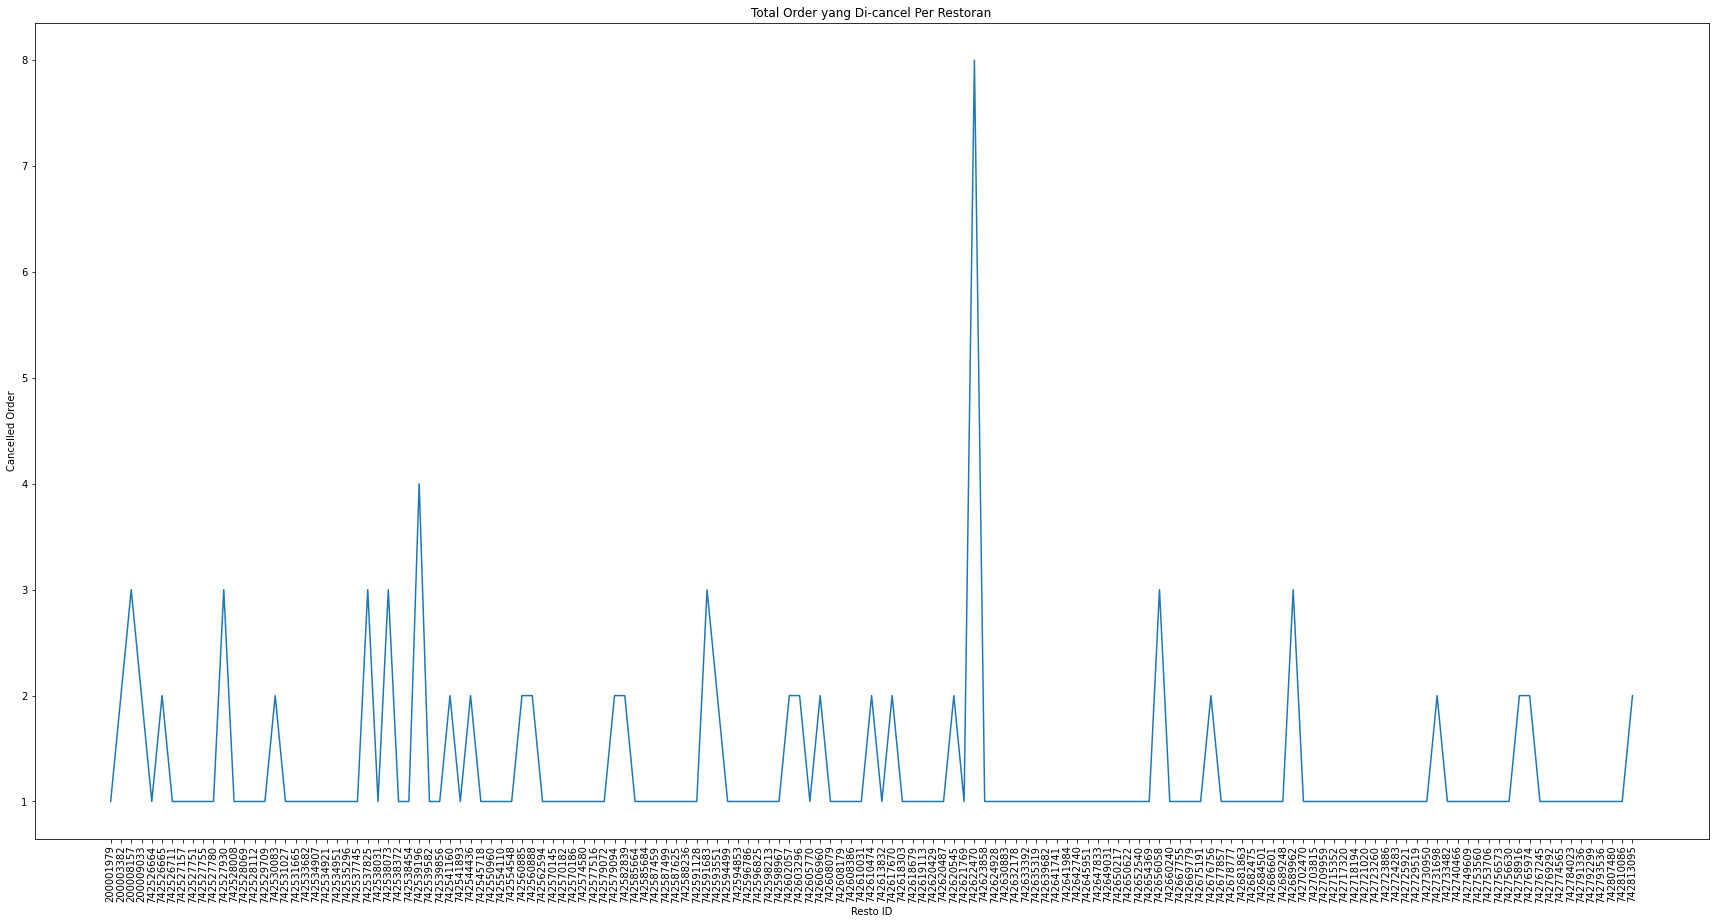

In [22]:
plt.figure(figsize=(30,15))
plt.plot(df1)

plt.title('Total Order yang Di-cancel Per Restoran')
plt.xlabel('Resto ID')
plt.xticks(rotation=90)
plt.ylabel('Cancelled Order')

plt.show()